# Comparison of the Different Merge_After
- Number of initial chains: 7
- Vary merge_after parameter (1, 2, 3, 4) (as 5 is mean and median, majority of chains still have merge during generation)

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from utils import *

In [2]:
experiments = [f"m1_{i}" for i in range(1, 5)] + [f"m2_{i}" for i in range(1, 5)] + [f"n1_{i}" for i in range(1, 5)] +  [f"n2_{i}" for i in range(1, 5)]
complete_folders = check_existing_folders(experiments)


ERROR n2_1 has missing files
['n2_1_em_results.jsonl', 'n2_1_llm_comparison_results.jsonl', 'n2_1_roscoe.jsonl', 'n2_1_roscoe_results.tsv', 'n2_1_bert_score_results.jsonl', 'n2_1_f1_results.jsonl']

ERROR n2_3 has missing files
['n2_3_em_results.jsonl', 'n2_3_llm_comparison_results.jsonl', 'n2_3_roscoe.jsonl', 'n2_3_roscoe_results.tsv', 'n2_3_bert_score_results.jsonl', 'n2_3_f1_results.jsonl']

Folders with all required files:
['m1_1', 'm1_2', 'm1_3', 'm1_4', 'm2_1', 'm2_2', 'm2_3', 'm2_4', 'n1_1', 'n1_2', 'n1_3', 'n1_4', 'n2_2', 'n2_4']


In [3]:
# For paper
plt.rcParams.update({
    "font.size": 22,
    "axes.titlesize": 22,
    "axes.labelsize": 22,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "legend.title_fontsize": 22,
    "figure.dpi": 300
})

In [4]:
line_color_map = {
    "n1": "#eed202",  # dark yellow
    "n2": "#86b049",  # green
    "m1": "#1f77b4",  # blue
    "m2": "#e377c2",  # magenta
}

In [17]:
def plot_k_curve(metric_file_name="_em_results.jsonl", metric_column=None, metric_name="predicted", ylabel="Score", title=""):
    data = {}

    for exp in experiments:
        if metric_column is None:
            score = compute_accuracy(exp, metric_file_name, metric_name)
        else:
            score = compute_roscoe_metric(exp, metric_file_name, metric_column)

        base = exp[:-2]
        k = int(exp.split("_")[1])
        if base not in data:
            data[base] = {}
        data[base][k] = score

    fig, ax = plt.subplots(figsize=(10, 6))

    for base, k_scores in data.items():
        ks = sorted(k_scores.keys())
        scores = [k_scores[k] for k in ks]
        ax.plot(ks, scores,
                label=base.upper(),
                color=line_color_map.get(base),
                linewidth=3)
        if "n" in base:
            marker_type, marker_size = ("^", 130)
        else:
            marker_type, marker_size = ("x", 130)
        ax.scatter(ks, scores, color=line_color_map.get(base), zorder=5, s=marker_size, marker=marker_type)

    ax.set_xlabel("k")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks([1, 2, 3, 4])
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle="--", alpha=0.6)

    # Legend
    legend_elements = []
    for k in ["n1", "n2", "m1", "m2"]:
        if "n" in k:
            marker, _ = ("^", 130)
        else:
            marker, _ = ("x", 130)
        legend_elements.append(
            Line2D([0], [0],
                   color=line_color_map[k],
                   marker=marker,
                   label=k.upper(),
                   markersize=10,
                   linewidth=3)
        )

    ax.legend(handles=legend_elements, title="Experiment")
    plt.tight_layout()
    plt.show()

ERROR: ../experiments_results\n2_1\n2_1_em_results.jsonl not found. Defaulting to 100% accuracy.
ERROR: ../experiments_results\n2_3\n2_3_em_results.jsonl not found. Defaulting to 100% accuracy.


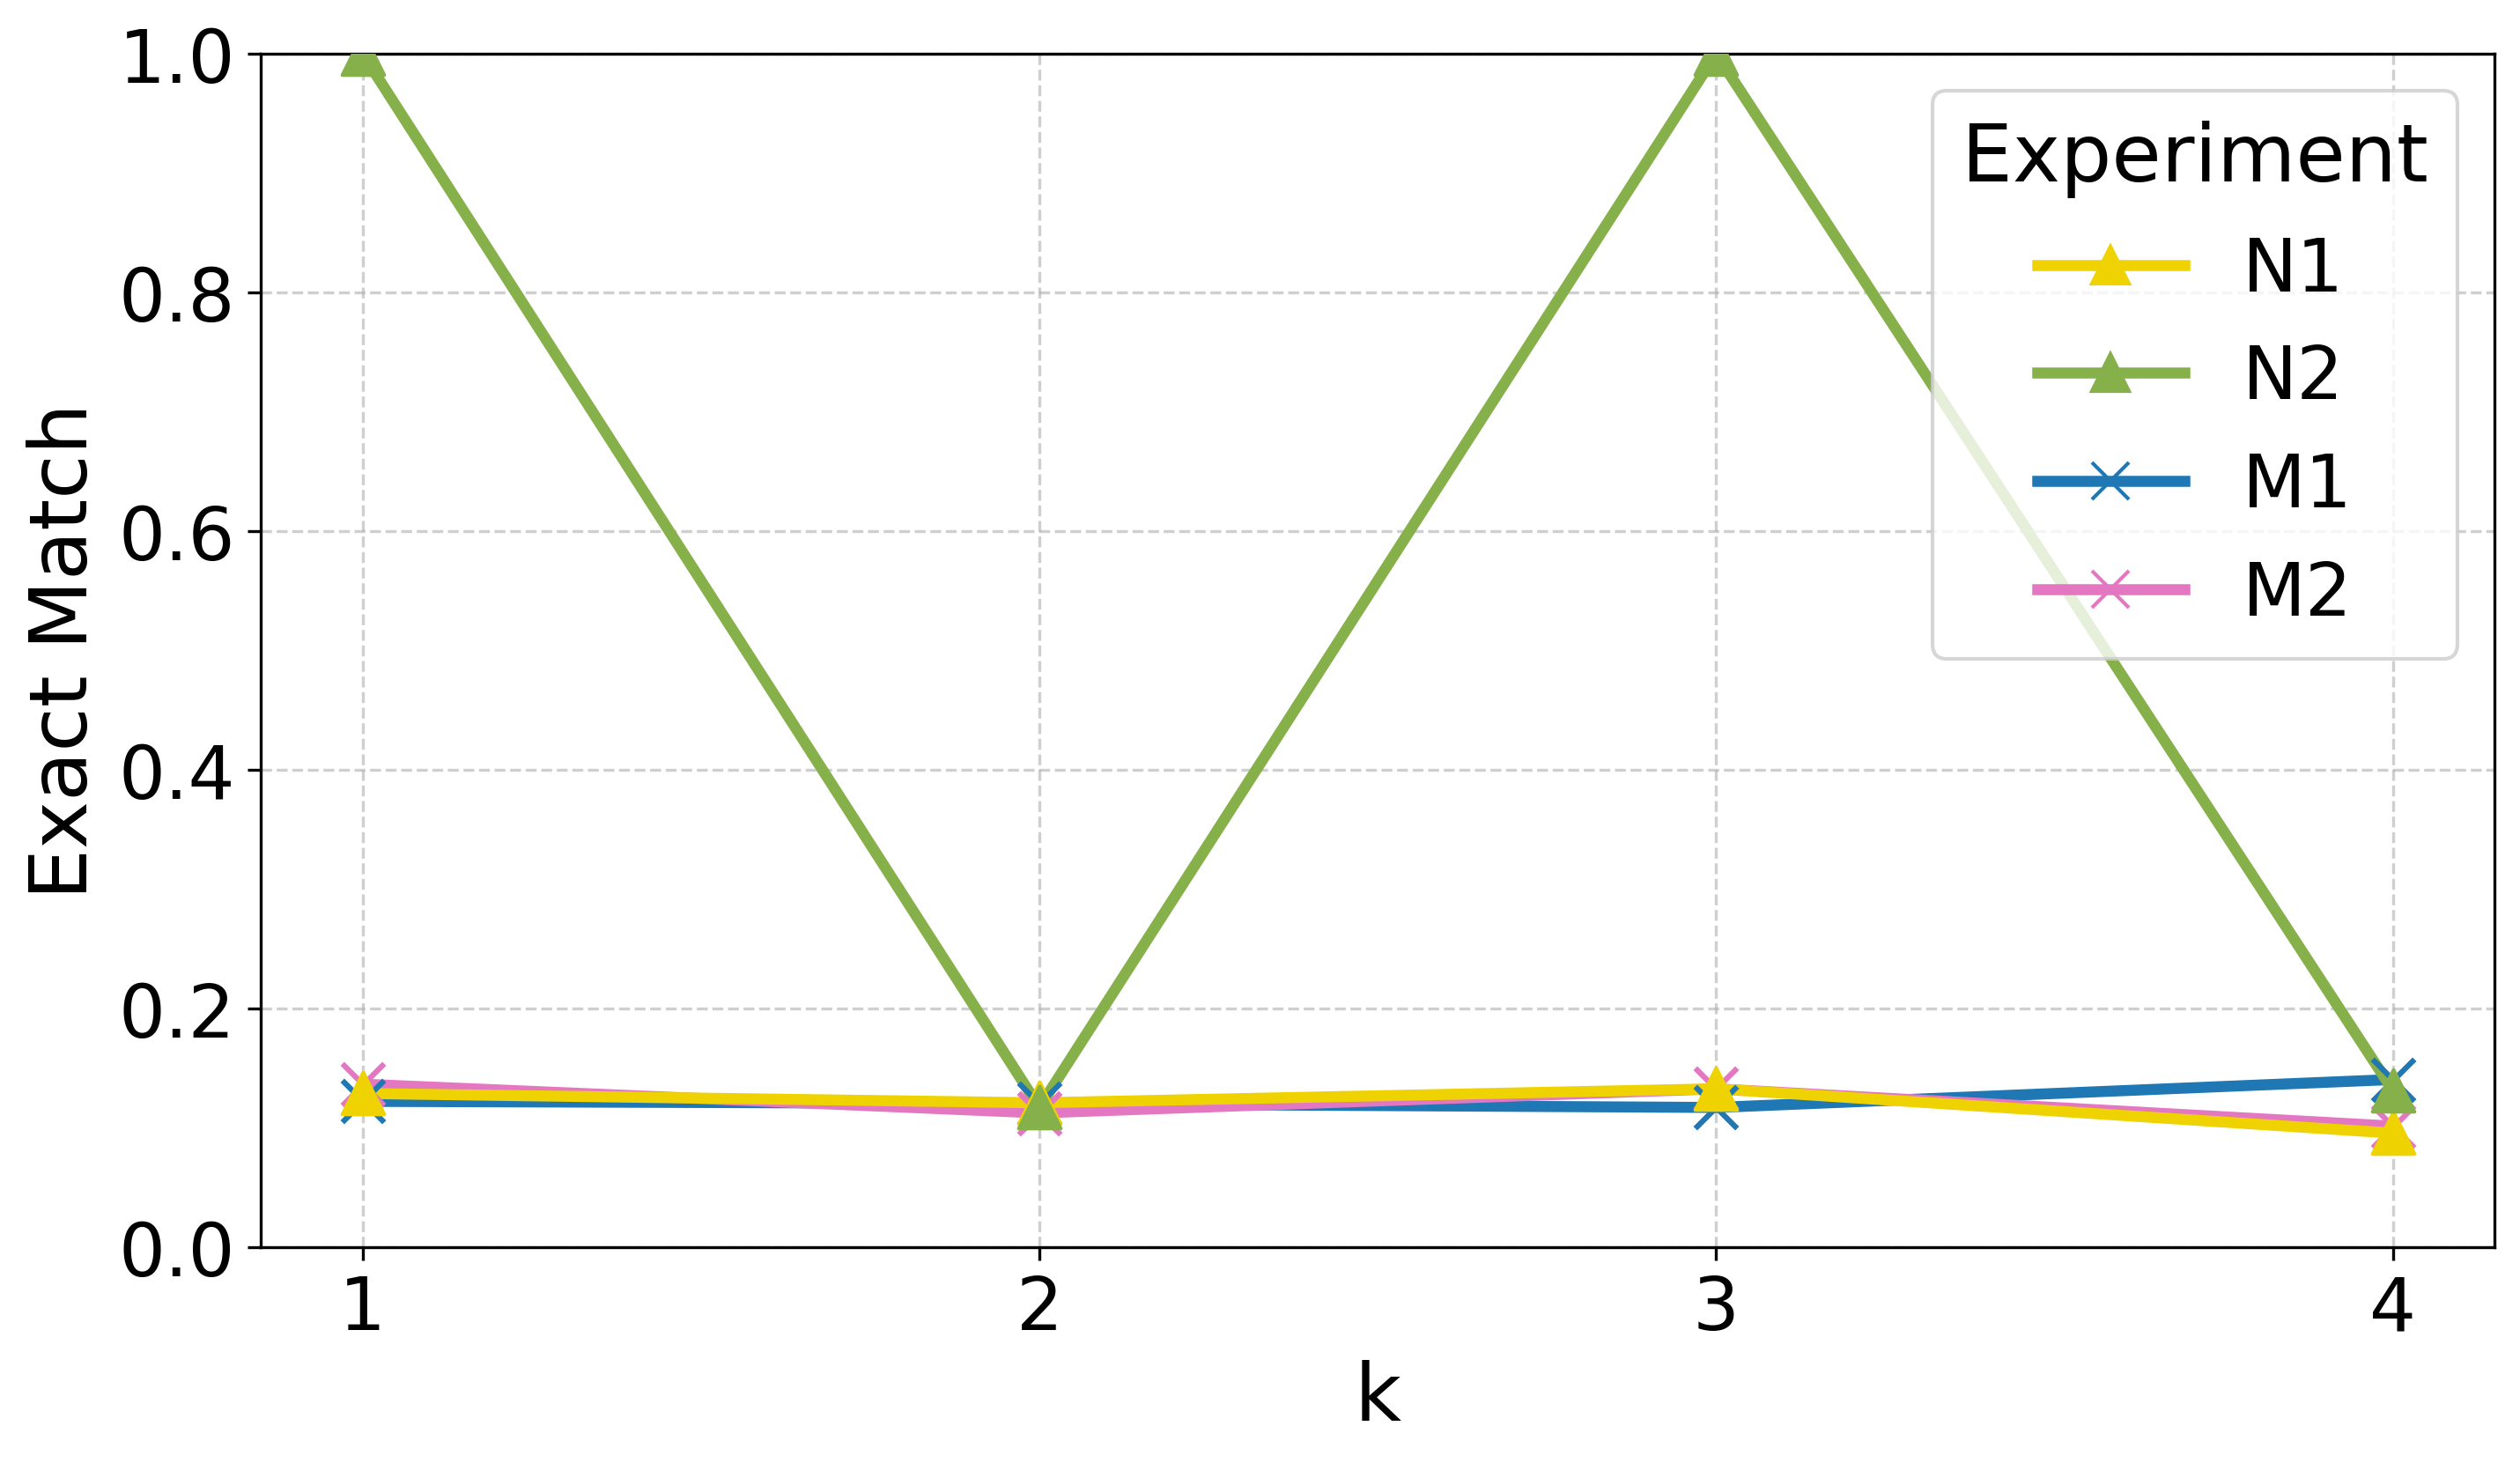

In [18]:
plot_k_curve(metric_file_name="_em_results.jsonl", metric_column=None, metric_name="predicted", ylabel="Exact Match")